In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [14]:
data = pd.read_csv('hotel_bookings.csv')

In [15]:
data['children'] = data['children'].fillna(0)

In [16]:
data['hotel'] = data['hotel'].map({'Resort Hotel':0, 'City Hotel':1})

data['arrival_date_month'] = data['arrival_date_month'].map({'January':1, 'February': 2, 'March':3, 'April':4, 'May':5, 'June':6, 'July':7,
                                                            'August':8, 'September':9, 'October':10, 'November':11, 'December':12})

In [17]:
def family(data):
    if ((data['adults'] > 0) & (data['children'] > 0)):
        val = 1
    elif ((data['adults'] > 0) & (data['babies'] > 0)):
        val = 1
    else:
        val = 0
    return val

In [18]:
data["is_family"] = data.apply(family, axis = 1)
data["total_customer"] = data["adults"] + data["children"] + data["babies"]

In [19]:
data = data.drop(columns = ['adults', 'babies', 'children', 'reservation_status_date', 'reservation_status', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month'])

In [20]:
data.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_month                     0
stays_in_weekend_nights                0
stays_in_week_nights                   0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company                           112593
days_in_waiting_list                   0
customer_type                          0
adr                                    0
required_car_parking_spaces            0
total_of_special_requests              0
is_family       

In [21]:
#drop null rows for column "Country"
data.dropna(subset=['country'],inplace=True)

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118902 entries, 0 to 119389
Data columns (total 26 columns):
hotel                             118902 non-null int64
is_canceled                       118902 non-null int64
lead_time                         118902 non-null int64
arrival_date_month                118902 non-null int64
stays_in_weekend_nights           118902 non-null int64
stays_in_week_nights              118902 non-null int64
meal                              118902 non-null object
country                           118902 non-null object
market_segment                    118902 non-null object
distribution_channel              118902 non-null object
is_repeated_guest                 118902 non-null int64
previous_cancellations            118902 non-null int64
previous_bookings_not_canceled    118902 non-null int64
reserved_room_type                118902 non-null object
assigned_room_type                118902 non-null object
booking_changes                   118902 no

In [23]:
#encoding both agent and company code

data['agent_encoded'] = data['agent'].notnull()
data['company_encoded'] = data['company'].notnull()
data["agent_encoded"] = data["agent_encoded"].astype(int)
data["company_encoded"] = data["company_encoded"].astype(int)
data=data.drop(['agent','company'],axis = 1)

In [65]:
data['country'].value_counts()

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
ITA     3766
IRL     3375
BEL     2342
BRA     2224
NLD     2104
USA     2097
CHE     1730
CN      1279
AUT     1263
SWE     1024
CHN      999
POL      919
ISR      669
RUS      632
NOR      607
ROU      500
FIN      447
DNK      435
AUS      426
AGO      362
LUX      287
MAR      259
TUR      248
HUN      230
ARG      214
       ...  
SMR        1
MMR        1
MLI        1
UMI        1
NCL        1
AIA        1
KIR        1
NPL        1
PYF        1
GUY        1
BWA        1
BFA        1
ASM        1
SLE        1
NAM        1
ATF        1
PLW        1
MRT        1
VGB        1
MDG        1
CYM        1
BHS        1
NIC        1
BDI        1
FJI        1
DJI        1
HND        1
LCA        1
DMA        1
SDN        1
Name: country, Length: 177, dtype: int64

### Plots for the report

#### Plot for country importance

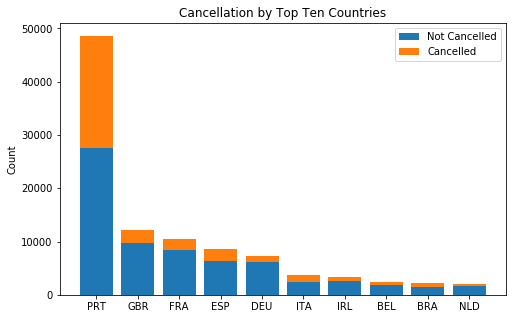

In [142]:
plt.figure(figsize=(8, 5))

top10countries = data['country'].value_counts().keys()[:10]
noCancelCount = [data[data['country'] == x]['is_canceled'].value_counts().values[0] for x in top10countries]
cancelCount = [data[data['country'] == x]['is_canceled'].value_counts().values[1] for x in top10countries]

p1 = plt.bar(top10countries, noCancelCount)
p2 = plt.bar(top10countries, cancelCount, bottom=noCancelCount)

plt.ylabel('Count')
plt.title('Cancellation by Top Ten Countries')
plt.xticks(top10countries)
plt.legend((p1[0], p2[0]), ('Not Cancelled', 'Cancelled'))

plt.show()

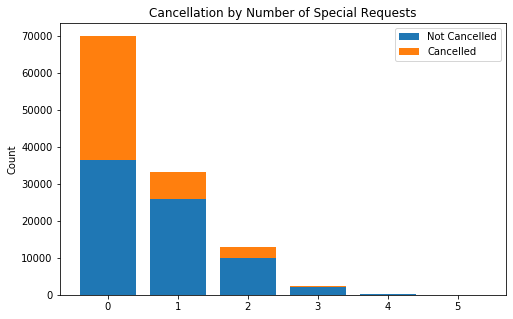

In [143]:
plt.figure(figsize=(8, 5))

numRequests = set(data['total_of_special_requests'])
noCancelCount = [data[data['total_of_special_requests'] == x]['is_canceled'].value_counts().values[0] for x in numRequests]
cancelCount = [data[data['total_of_special_requests'] == x]['is_canceled'].value_counts().values[1] for x in numRequests]

p1 = plt.bar([str(x) for x in numRequests], noCancelCount)
p2 = plt.bar([str(x) for x in numRequests], cancelCount, bottom=noCancelCount)

plt.ylabel('Count')
plt.title('Cancellation by Number of Special Requests')
plt.xticks([str(x) for x in numRequests])
plt.legend((p1[0], p2[0]), ('Not Cancelled', 'Cancelled'))

plt.show()

In [122]:
numRequests

{0, 1, 2, 3, 4, 5}

In [12]:
#columns to encode

# to_encode = ["deposit_type", "customer_type", "hotel" , "meal", 'country','market_segment',"distribution_channel",'assigned_room_type', 'reserved_room_type', "arrival_date_month"]
to_encode = ["meal", "country", "market_segment", "distribution_channel", "reserved_room_type", "assigned_room_type", "deposit_type", "customer_type"]

for column in data.columns:
    if column in to_encode:
        le = preprocessing.LabelEncoder()
        le.fit(data[column].astype(str))
        data[column]=le.transform(data[column])
        keys = le.classes_
        values = le.transform(le.classes_)
        dictionary = dict(zip(keys, values))
        print(dictionary)

{'BB': 0, 'FB': 1, 'HB': 2, 'SC': 3, 'Undefined': 4}
{'ABW': 0, 'AGO': 1, 'AIA': 2, 'ALB': 3, 'AND': 4, 'ARE': 5, 'ARG': 6, 'ARM': 7, 'ASM': 8, 'ATA': 9, 'ATF': 10, 'AUS': 11, 'AUT': 12, 'AZE': 13, 'BDI': 14, 'BEL': 15, 'BEN': 16, 'BFA': 17, 'BGD': 18, 'BGR': 19, 'BHR': 20, 'BHS': 21, 'BIH': 22, 'BLR': 23, 'BOL': 24, 'BRA': 25, 'BRB': 26, 'BWA': 27, 'CAF': 28, 'CHE': 29, 'CHL': 30, 'CHN': 31, 'CIV': 32, 'CMR': 33, 'CN': 34, 'COL': 35, 'COM': 36, 'CPV': 37, 'CRI': 38, 'CUB': 39, 'CYM': 40, 'CYP': 41, 'CZE': 42, 'DEU': 43, 'DJI': 44, 'DMA': 45, 'DNK': 46, 'DOM': 47, 'DZA': 48, 'ECU': 49, 'EGY': 50, 'ESP': 51, 'EST': 52, 'ETH': 53, 'FIN': 54, 'FJI': 55, 'FRA': 56, 'FRO': 57, 'GAB': 58, 'GBR': 59, 'GEO': 60, 'GGY': 61, 'GHA': 62, 'GIB': 63, 'GLP': 64, 'GNB': 65, 'GRC': 66, 'GTM': 67, 'GUY': 68, 'HKG': 69, 'HND': 70, 'HRV': 71, 'HUN': 72, 'IDN': 73, 'IMN': 74, 'IND': 75, 'IRL': 76, 'IRN': 77, 'IRQ': 78, 'ISL': 79, 'ISR': 80, 'ITA': 81, 'JAM': 82, 'JEY': 83, 'JOR': 84, 'JPN': 85, 'KAZ': 86, 

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118902 entries, 0 to 119389
Data columns (total 26 columns):
hotel                             118902 non-null int64
is_canceled                       118902 non-null int64
lead_time                         118902 non-null int64
arrival_date_month                118902 non-null int64
stays_in_weekend_nights           118902 non-null int64
stays_in_week_nights              118902 non-null int64
meal                              118902 non-null int32
country                           118902 non-null int32
market_segment                    118902 non-null int32
distribution_channel              118902 non-null int32
is_repeated_guest                 118902 non-null int64
previous_cancellations            118902 non-null int64
previous_bookings_not_canceled    118902 non-null int64
reserved_room_type                118902 non-null int32
assigned_room_type                118902 non-null int32
booking_changes                   118902 non-null

In [14]:
# features
X = data.drop(["is_canceled"], axis=1)

# target
y = data['is_canceled']

In [15]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118902 entries, 0 to 119389
Data columns (total 25 columns):
hotel                             118902 non-null int64
lead_time                         118902 non-null int64
arrival_date_month                118902 non-null int64
stays_in_weekend_nights           118902 non-null int64
stays_in_week_nights              118902 non-null int64
meal                              118902 non-null int32
country                           118902 non-null int32
market_segment                    118902 non-null int32
distribution_channel              118902 non-null int32
is_repeated_guest                 118902 non-null int64
previous_cancellations            118902 non-null int64
previous_bookings_not_canceled    118902 non-null int64
reserved_room_type                118902 non-null int32
assigned_room_type                118902 non-null int32
booking_changes                   118902 non-null int64
deposit_type                      118902 non-null

### Train Test Split without Scaling and PCA

In [16]:
from sklearn.model_selection import train_test_split
# split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=420)

In [17]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118902 entries, 0 to 119389
Data columns (total 25 columns):
hotel                             118902 non-null int64
lead_time                         118902 non-null int64
arrival_date_month                118902 non-null int64
stays_in_weekend_nights           118902 non-null int64
stays_in_week_nights              118902 non-null int64
meal                              118902 non-null int32
country                           118902 non-null int32
market_segment                    118902 non-null int32
distribution_channel              118902 non-null int32
is_repeated_guest                 118902 non-null int64
previous_cancellations            118902 non-null int64
previous_bookings_not_canceled    118902 non-null int64
reserved_room_type                118902 non-null int32
assigned_room_type                118902 non-null int32
booking_changes                   118902 non-null int64
deposit_type                      118902 non-null

In [18]:
X.describe()

,hotel,lead_time,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,meal,country,market_segment,distribution_channel,is_repeated_guest,...,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,is_family,total_customer,agent_encoded,company_encoded
count,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,...,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000
mean,0.666986,104.308027,6.552934,0.928891,2.502136,0.557097,92.990076,4.934812,2.591033,0.032010,...,0.125288,2.330676,2.137592,102.000808,0.061883,0.571706,0.076492,1.970556,0.865385,0.055701
std,0.471293,106.903127,3.087010,0.996211,1.900165,1.069544,44.676327,1.261363,0.901645,0.176026,...,0.335137,17.630161,0.577870,50.487004,0.244168,0.792678,0.265784,0.721888,0.341313,0.229345
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,18.000000,4.000000,0.000000,1.000000,0.000000,56.000000,4.000000,3.000000,0.000000,...,0.000000,0.000000,2.000000,70.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000
50%,1.000000,69.000000,7.000000,1.000000,2.000000,0.000000,81.000000,5.000000,3.000000,0.000000,...,0.000000,0.000000,2.000000,95.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000
75%,1.000000,161.000000,9.000000,2.000000,3.000000,0.000000,135.000000,6.000000,3.000000,0.000000,...,0.000000,0.000000,2.000000,126.000000,0.000000,1.000000,0.000000,2.000000,1.000000,0.000000
max,1.000000,737.000000,12.000000,16.000000,41.000000,4.000000,176.000000,7.000000,4.000000,1.000000,...,2.000000,391.000000,3.000000,5400.000000,8.000000,5.000000,1.000000,55.000000,1.000000,1.000000


### Scaling

In [19]:
# create copy of DF for scaling
X_scaled = X.copy()

In [20]:
from sklearn.preprocessing import StandardScaler

columns_to_scale = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights',
                    'previous_cancellations', 'previous_bookings_not_canceled',
                    'booking_changes', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
                    'total_of_special_requests', 'total_customer']

remaining_columns = [x for x in X_scaled.columns if x not in columns_to_scale]


# Scale columns
scaler = StandardScaler()

X_scaled[columns_to_scale] = scaler.fit_transform(X_scaled[columns_to_scale]) # to learn mean and standard dev to be used for scaling


In [21]:
# Train Test Split with Scaling
X_scaled_train, X_scaled_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=420)

### PCA

In [22]:
X_pca = X_scaled.copy()

In [23]:
X_pca.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118902 entries, 0 to 119389
Data columns (total 25 columns):
hotel                             118902 non-null int64
lead_time                         118902 non-null float64
arrival_date_month                118902 non-null int64
stays_in_weekend_nights           118902 non-null float64
stays_in_week_nights              118902 non-null float64
meal                              118902 non-null int32
country                           118902 non-null int32
market_segment                    118902 non-null int32
distribution_channel              118902 non-null int32
is_repeated_guest                 118902 non-null int64
previous_cancellations            118902 non-null float64
previous_bookings_not_canceled    118902 non-null float64
reserved_room_type                118902 non-null int32
assigned_room_type                118902 non-null int32
booking_changes                   118902 non-null float64
deposit_type                      118

In [24]:
from sklearn.decomposition import PCA

for i in range(1,24):
    pca = PCA(n_components=i, random_state=420)
    components = pca.fit_transform(X_pca)
    print(i)
    print('explained var ratio', pca.explained_variance_ratio_)
    print('sum', sum(pca.explained_variance_ratio_))
    print()

1
explained var ratio [0.98466127]
sum 0.984661266616064

2
explained var ratio [0.98466127 0.00471421]
sum 0.989375472596723

3
explained var ratio [0.98466127 0.00471421 0.00307917]
sum 0.9924546439333461

4
explained var ratio [0.98466127 0.00471421 0.00307917 0.00123228]
sum 0.9936869193929552

5
explained var ratio [9.84661267e-01 4.71420598e-03 3.07917134e-03 1.23227585e-03
 7.51695817e-04]
sum 0.994438615596982

6
explained var ratio [9.84661267e-01 4.71420598e-03 3.07917134e-03 1.23227121e-03
 7.51696284e-04 6.31310500e-04]
sum 0.9950699219214072

7
explained var ratio [9.84661267e-01 4.71420598e-03 3.07917134e-03 1.23227569e-03
 7.51701832e-04 6.31527737e-04 5.56318986e-04]
sum 0.9956264681837466

8
explained var ratio [9.84661267e-01 4.71420598e-03 3.07917134e-03 1.23227590e-03
 7.51702086e-04 6.31532410e-04 5.56456492e-04 5.35484119e-04]
sum 0.9961620949381402

9
explained var ratio [9.84661267e-01 4.71420598e-03 3.07917134e-03 1.23227590e-03
 7.51702086e-04 6.31532435e-04 5

In [25]:
n = 11 
pca = PCA(n_components=n, random_state=69)
pca_components = pca.fit_transform(X_pca)
print('explained var ratio', pca.explained_variance_ratio_)
print('sum', sum(pca.explained_variance_ratio_))

columns = []
for i in range(n):
    x = "pc" + str(i)
    columns.append(x)

# convert numpy array to dataframe
X_pca = pd.DataFrame(pca_components, columns=columns)
X_pca

explained var ratio [9.84661267e-01 4.71420598e-03 3.07917134e-03 1.23227590e-03
 7.51702092e-04 6.31532435e-04 5.56456504e-04 5.35484194e-04
 5.09631816e-04 4.93942207e-04 4.47154757e-04]
sum 0.9976128238380605


,pc0,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10
0,-42.034515,-0.376198,0.932633,-2.830173,1.186090,-0.605673,-1.304855,0.584428,0.775101,-2.213400,-3.153266
1,-42.037614,-0.554474,0.742330,-2.459376,2.844762,-1.680876,-1.464983,1.392002,1.814646,-3.295452,-4.412650
2,33.953359,-0.372435,-0.759516,-3.537941,-0.777114,-0.377454,-0.468921,-0.543039,-0.862095,0.189525,0.061694
3,33.937846,-0.372741,-2.191080,-4.289778,-0.389914,-0.231609,-0.551343,-0.334350,-0.053594,1.046735,0.107302
4,33.986321,-0.469003,-1.691806,0.544929,-1.318948,0.115069,0.397515,-0.778485,0.195386,-0.017526,-0.139974
5,33.986321,-0.469003,-1.691806,0.544929,-1.318948,0.115069,0.397515,-0.778485,0.195386,-0.017526,-0.139974
6,-42.026513,-0.289184,1.389691,-2.323425,-0.461578,-0.260196,-0.469983,-0.109942,-0.027620,1.110346,-0.024808
7,-42.018689,-0.306526,1.394714,-1.812839,-0.599253,0.494999,-0.519810,0.494639,-0.067230,0.885995,0.043424
8,-42.007890,-0.377285,-1.250490,1.357408,-0.702265,0.226809,0.386390,-0.861406,0.179223,-0.201876,-0.142596
9,-41.993078,-0.344078,2.611082,0.528291,-0.417010,-0.178497,-0.675388,1.073530,-1.469928,0.173639,0.301460


In [26]:
# Train Test Split with Scaling and PCA
X_pca_scaled_train, X_pca_scaled_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=420)